# step-1 Business Problem Understanding

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract
- load/connect the raw data
- Data Understanding
- Data Exploration

In [2]:
df = pd.read_csv("Loan_default.csv")
df


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan Date (DD/MM/YYYY)
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0,10/15/2018
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0,3/25/2016
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1,11/11/2013
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0,6/22/2017
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0,6/9/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0,10/7/2017
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1,1/1/2016
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0,3/5/2017
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0,4/5/2013


In [3]:
df.shape

(255347, 19)

In [4]:
df.columns.tolist()

['LoanID',
 'Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner',
 'Default',
 'Loan Date (DD/MM/YYYY)']

In [5]:
df["LoanID"].unique()

array(['I38PQUQS96', 'HPSK72WA7R', 'C1OZ6DPJ8Y', ..., 'XQK1UUUNGP',
       'JAO28CPL4H', 'ZTH91CGL0B'], shape=(255347,), dtype=object)

In [6]:
df["LoanID"].nunique()

255347

In [7]:
df["Age"].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
       47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
       31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49,
       63])

In [8]:
df["Income"].unique()

array([ 85994,  50432,  84208, ..., 104108,  76558, 124446],
      shape=(114620,))

In [9]:
df["LoanAmount"].unique()

array([ 50587, 124440, 129188, ..., 105905, 168231, 208294],
      shape=(158729,))

In [10]:
df["CreditScore"].unique()

array([520, 458, 451, 743, 633, 720, 429, 531, 827, 480, 652, 375, 829,
       395, 635, 432, 313, 811, 319, 376, 419, 583, 528, 468, 839, 343,
       514, 462, 580, 604, 551, 840, 787, 607, 669, 506, 540, 695, 707,
       386, 747, 400, 639, 795, 498, 560, 505, 393, 369, 439, 634, 657,
       417, 455, 351, 655, 737, 771, 775, 680, 694, 534, 529, 416, 318,
       411, 802, 305, 674, 585, 750, 303, 487, 730, 579, 658, 683, 574,
       421, 719, 692, 542, 453, 618, 659, 371, 517, 701, 361, 578, 656,
       553, 734, 346, 584, 481, 447, 691, 457, 616, 564, 315, 436, 533,
       372, 394, 834, 339, 415, 668, 748, 715, 479, 696, 751, 842, 769,
       577, 602, 497, 714, 396, 513, 522, 335, 601, 499, 380, 640, 566,
       627, 786, 524, 449, 489, 401, 666, 818, 841, 406, 508, 749, 620,
       536, 592, 541, 316, 609, 705, 424, 770, 407, 611, 398, 739, 777,
       763, 826, 726, 310, 815, 797, 317, 626, 708, 334, 434, 381, 552,
       347, 413, 338, 760, 740, 721, 672, 464, 494, 470, 624, 36

In [11]:
df["MonthsEmployed"].unique()

array([ 80,  15,  26,   0,   8,  18,  67,  83, 114,  94,  56,  87, 112,
        31,  49, 106, 119,  65,  96,  55,  48,  73, 110,  58,  62,  16,
        57,  37,   6, 103,  39,  51,  24, 105,  47, 117,  32,  99,  84,
        72,  88,  27,  36,  33,  59,  20,  54,  76,  66,  11,  23,  22,
        93,  35,  50,  69,  70, 111,  63,   9,   1,  44,  25,  71, 101,
        53,  45,  91,  52,  74,  86,   4,  10,  82,   7,  79,  85,  12,
        17,  28,  68, 100,  60, 115,  43,  14,  13, 104,  95, 118, 113,
        97, 108,  40,  77, 109,  34,  41,  92,  46,   2,   3,  78, 116,
        89,  75,  81,   5,  90, 107,  98,  21,  64,  29,  30,  19,  38,
        61,  42, 102])

In [12]:
df["NumCreditLines"].unique()

array([4, 1, 3, 2])

In [13]:
df["InterestRate"].unique()

array([15.23,  4.81, 21.17, ...,  2.46, 19.81,  9.01], shape=(2301,))

In [14]:
df["LoanTerm"].unique()

array([36, 60, 24, 48, 12])

In [15]:
df["DTIRatio"].unique()

array([0.44, 0.68, 0.31, 0.23, 0.73, 0.1 , 0.16, 0.43, 0.2 , 0.33, 0.8 ,
       0.45, 0.89, 0.28, 0.66, 0.17, 0.39, 0.65, 0.38, 0.47, 0.22, 0.5 ,
       0.19, 0.12, 0.82, 0.78, 0.86, 0.69, 0.75, 0.53, 0.4 , 0.48, 0.56,
       0.3 , 0.42, 0.81, 0.58, 0.32, 0.76, 0.59, 0.74, 0.25, 0.37, 0.51,
       0.24, 0.15, 0.36, 0.41, 0.71, 0.49, 0.6 , 0.72, 0.57, 0.87, 0.62,
       0.18, 0.64, 0.83, 0.11, 0.7 , 0.35, 0.88, 0.79, 0.84, 0.52, 0.61,
       0.14, 0.54, 0.9 , 0.67, 0.26, 0.29, 0.34, 0.77, 0.55, 0.13, 0.63,
       0.46, 0.21, 0.85, 0.27])

In [16]:
df["Education"].unique()

array(["Bachelor's", "Master's", 'High School', 'PhD'], dtype=object)

In [17]:
df["Education"].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [18]:
df["EmploymentType"].unique()

array(['Full-time', 'Unemployed', 'Self-employed', 'Part-time'],
      dtype=object)

In [19]:
df["EmploymentType"].value_counts()

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

In [20]:
df["MaritalStatus"].unique()

array(['Divorced', 'Married', 'Single'], dtype=object)

In [21]:
df["MaritalStatus"].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [22]:
df["HasMortgage"].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
df["HasMortgage"].value_counts()

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

In [24]:
df["HasDependents"].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df["HasDependents"].value_counts()

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

In [26]:
df["LoanPurpose"].unique()

array(['Other', 'Auto', 'Business', 'Home', 'Education'], dtype=object)

In [27]:
df["LoanPurpose"].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

In [28]:
df["HasCoSigner"].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
df["HasCoSigner"].value_counts()

HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64

In [30]:
df["Default"].unique()

array([0, 1])

In [31]:
df=df.rename(columns={'Default':'Loan_Status'})

In [32]:
df['Loan_Status'] = df['Loan_Status'].replace({1:"not paid",0:"paid"})

In [33]:
df["Loan_Status"].unique()

array(['paid', 'not paid'], dtype=object)

In [34]:
df["Loan_Status"].value_counts()

Loan_Status
paid        225694
not paid     29653
Name: count, dtype: int64

In [35]:
df.dtypes

LoanID                     object
Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Education                  object
EmploymentType             object
MaritalStatus              object
HasMortgage                object
HasDependents              object
LoanPurpose                object
HasCoSigner                object
Loan_Status                object
Loan Date (DD/MM/YYYY)     object
dtype: object

In [36]:
df.isnull().sum()

LoanID                    0
Age                       0
Income                    0
LoanAmount                0
CreditScore               0
MonthsEmployed            0
NumCreditLines            0
InterestRate              0
LoanTerm                  0
DTIRatio                  0
Education                 0
EmploymentType            0
MaritalStatus             0
HasMortgage               0
HasDependents             0
LoanPurpose               0
HasCoSigner               0
Loan_Status               0
Loan Date (DD/MM/YYYY)    0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   LoanID                  255347 non-null  object 
 1   Age                     255347 non-null  int64  
 2   Income                  255347 non-null  int64  
 3   LoanAmount              255347 non-null  int64  
 4   CreditScore             255347 non-null  int64  
 5   MonthsEmployed          255347 non-null  int64  
 6   NumCreditLines          255347 non-null  int64  
 7   InterestRate            255347 non-null  float64
 8   LoanTerm                255347 non-null  int64  
 9   DTIRatio                255347 non-null  float64
 10  Education               255347 non-null  object 
 11  EmploymentType          255347 non-null  object 
 12  MaritalStatus           255347 non-null  object 
 13  HasMortgage             255347 non-null  object 
 14  HasDependents       

In [38]:
continous=['Age','Income','LoanAmount','CreditScore','MonthsEmployed','InterestRate','DTIRatio']
categorical=['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner','Loan_Status']
count=['NumCreditLines','LoanTerm']

In [39]:
df[continous].describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,InterestRate,DTIRatio
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,13.492773,0.500212
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,6.636443,0.230917
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,2.000000,0.100000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,7.770000,0.300000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,13.460000,0.500000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,19.250000,0.700000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,25.000000,0.900000


In [40]:
df[categorical].describe()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Loan_Status
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes,paid
freq,64366,64161,85302,127677,127742,51298,127701,225694


In [41]:
df.duplicated().sum()

np.int64(0)

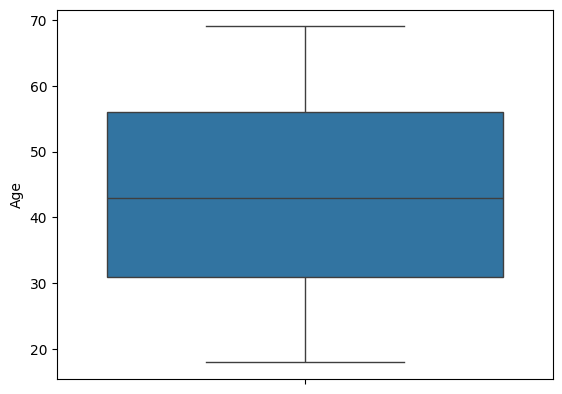

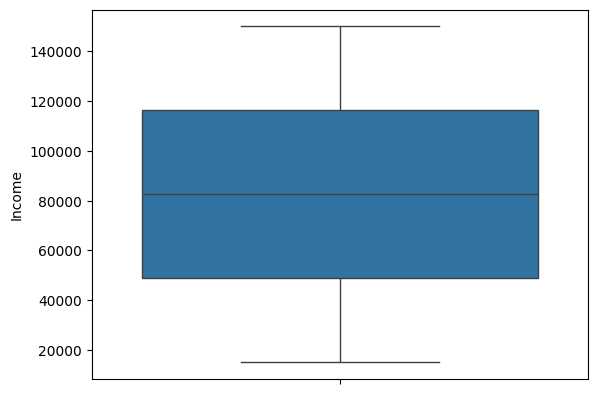

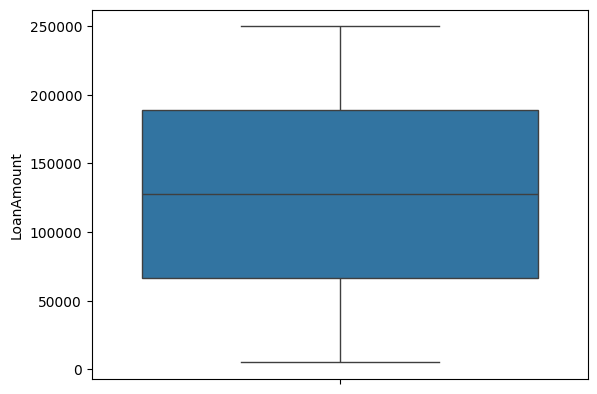

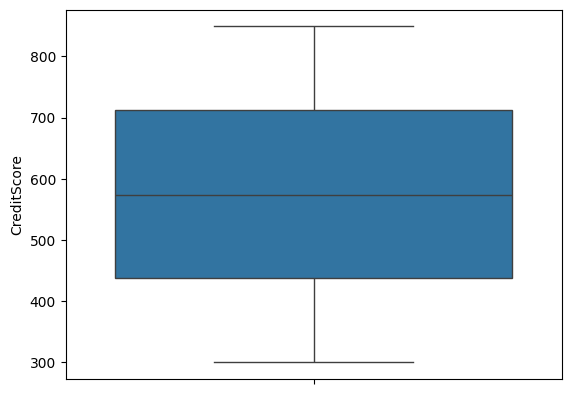

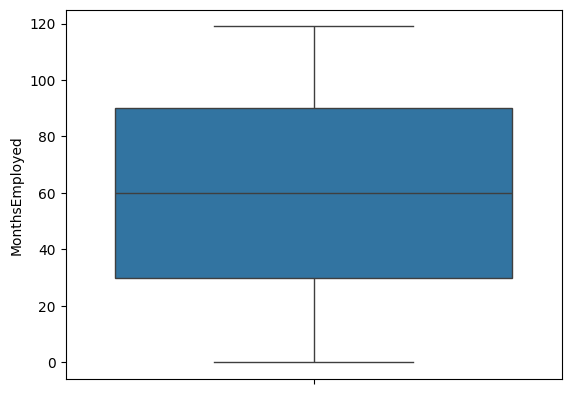

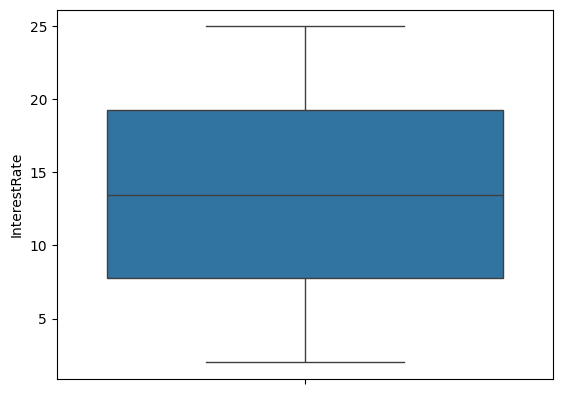

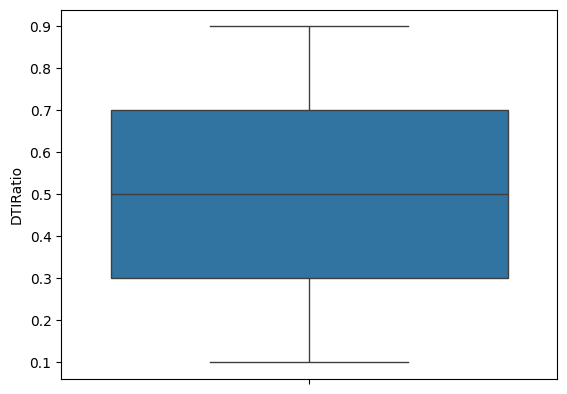

In [42]:
for i in continous:
    sns.boxplot(df[i])
    plt.show()

In [43]:
df[continous].skew()

Age               0.000698
Income           -0.000381
LoanAmount       -0.001827
CreditScore       0.004688
MonthsEmployed   -0.002142
InterestRate      0.004608
DTIRatio         -0.001499
dtype: float64

# Transform
- data cleaning
- data wrangling(if required)
- column selection
- column addition(if required)

# Data cleaning

In [44]:
df.isnull().sum()

LoanID                    0
Age                       0
Income                    0
LoanAmount                0
CreditScore               0
MonthsEmployed            0
NumCreditLines            0
InterestRate              0
LoanTerm                  0
DTIRatio                  0
Education                 0
EmploymentType            0
MaritalStatus             0
HasMortgage               0
HasDependents             0
LoanPurpose               0
HasCoSigner               0
Loan_Status               0
Loan Date (DD/MM/YYYY)    0
dtype: int64

In [45]:
df.dtypes

LoanID                     object
Age                         int64
Income                      int64
LoanAmount                  int64
CreditScore                 int64
MonthsEmployed              int64
NumCreditLines              int64
InterestRate              float64
LoanTerm                    int64
DTIRatio                  float64
Education                  object
EmploymentType             object
MaritalStatus              object
HasMortgage                object
HasDependents              object
LoanPurpose                object
HasCoSigner                object
Loan_Status                object
Loan Date (DD/MM/YYYY)     object
dtype: object

In [46]:
df

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Loan_Status,Loan Date (DD/MM/YYYY)
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,paid,10/15/2018
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,paid,3/25/2016
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,not paid,11/11/2013
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,paid,6/22/2017
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,paid,6/9/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,paid,10/7/2017
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,not paid,1/1/2016
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,paid,3/5/2017
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,paid,4/5/2013


In [47]:
#remove unimportant columns
df=df.drop(columns=['LoanID'])

In [48]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Loan_Status,Loan Date (DD/MM/YYYY)
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,paid,10/15/2018
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,paid,3/25/2016
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,not paid,11/11/2013
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,paid,6/22/2017
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,paid,6/9/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,paid,10/7/2017
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,not paid,1/1/2016
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,paid,3/5/2017
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,paid,4/5/2013


In [49]:
df.to_csv("cleaned_data.csv",index=False)

# load
-load cleaned data

In [50]:
df=pd.read_csv("cleaned_data.csv")

In [51]:

df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Loan_Status,Loan Date (DD/MM/YYYY)
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,paid,10/15/2018
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,paid,3/25/2016
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,not paid,11/11/2013
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,paid,6/22/2017
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,paid,6/9/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,paid,10/7/2017
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,not paid,1/1/2016
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,paid,3/5/2017
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,paid,4/5/2013


# Data Analysis
- measures + plots
- Univariate,Bivariate,Multivariate

Applying various questions or logics on dataset

In [52]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Loan_Status,Loan Date (DD/MM/YYYY)
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,paid,10/15/2018
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,paid,3/25/2016
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,not paid,11/11/2013
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,paid,6/22/2017
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,paid,6/9/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,paid,10/7/2017
255343,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,not paid,1/1/2016
255344,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,paid,3/5/2017
255345,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,paid,4/5/2013


# univariate on categorical

In [53]:
#1 which category people have no of applications
df["Education"].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

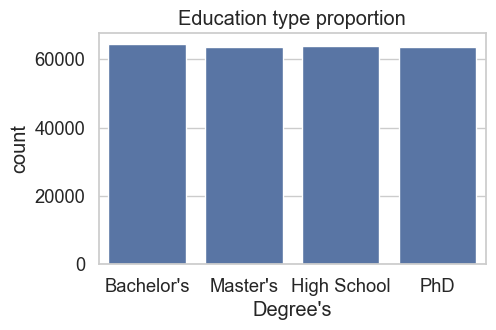

In [102]:
plt.figure(figsize=(5,3))
sns.countplot(data=df,x="Education")
plt.title("Education type proportion")
plt.xlabel("Degree's")
plt.show()

In [ ]:
continous=['Age','Income','LoanAmount','CreditScore','MonthsEmployed','InterestRate','DTIRatio']
categorical=['Education','EmploymentType','MaritalStatus','HasMortgage','HasDependents','LoanPurpose','HasCoSigner','Loan_Status']
count=['NumCreditLines','LoanTerm']

In [103]:
for i in categorical:
    print(f"\n-- Univariate Analysis for: {i} ---")
    print(df[i].value_counts())
   # print(df[i].value_counts(normalize=True))


-- Univariate Analysis for: Education ---
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

-- Univariate Analysis for: EmploymentType ---
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

-- Univariate Analysis for: MaritalStatus ---
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

-- Univariate Analysis for: HasMortgage ---
HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

-- Univariate Analysis for: HasDependents ---
HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

-- Univariate Analysis for: LoanPurpose ---
LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

-- Univariate Analysis for: HasCoSigner ---
HasCoSigner
Yes    127701
No     127646
Name: count, dtype: int64


-every categorical type has close to each other
-loan status has 29,653 unpaid customers among 2,25,694.its nearly 12% people are not paying the loan on time.

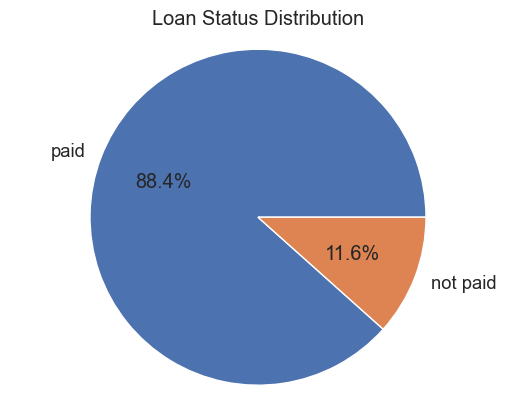

In [104]:
loan_counts = df['Loan_Status'].value_counts()

plt.pie(loan_counts, labels=loan_counts.index, autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.axis('equal')  
plt.show()


-- Univariate Analysis for: Education ---


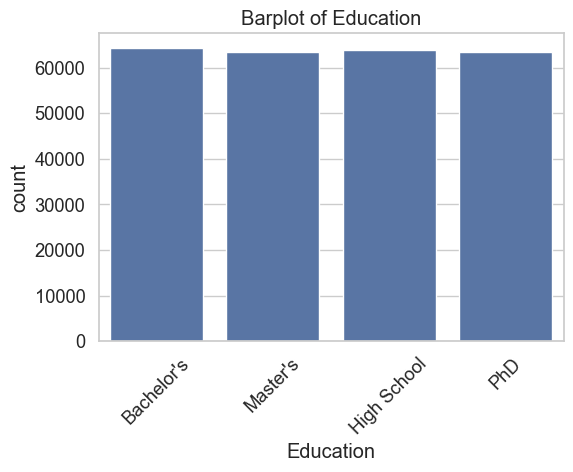


-- Univariate Analysis for: EmploymentType ---


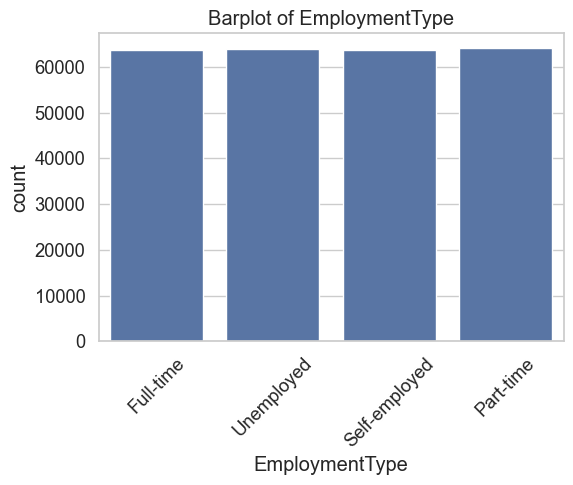


-- Univariate Analysis for: MaritalStatus ---


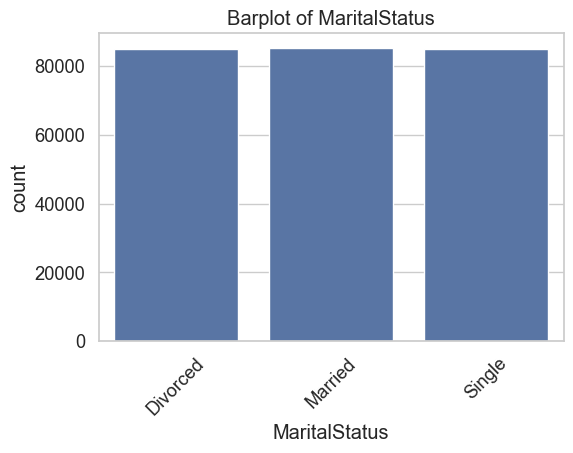


-- Univariate Analysis for: HasMortgage ---


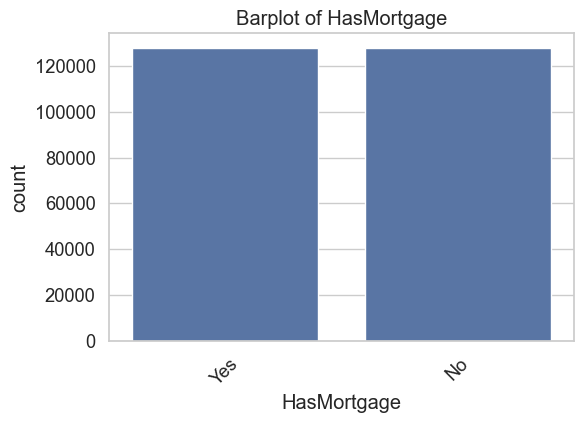


-- Univariate Analysis for: HasDependents ---


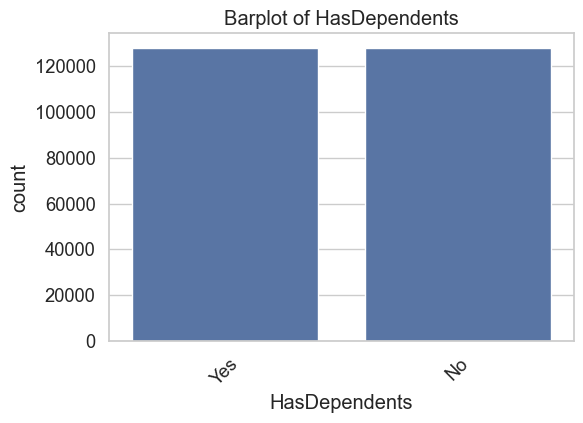


-- Univariate Analysis for: LoanPurpose ---


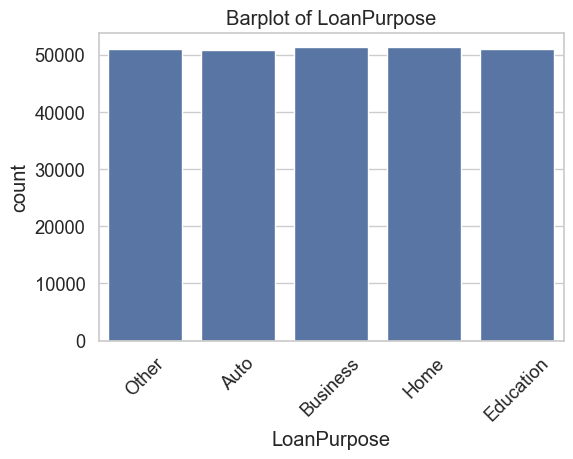


-- Univariate Analysis for: HasCoSigner ---


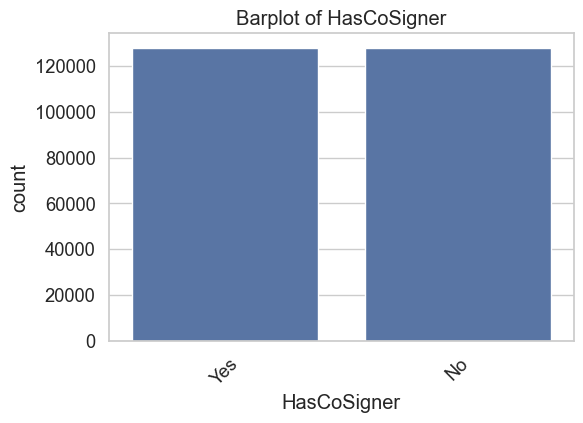


-- Univariate Analysis for: Loan_Status ---


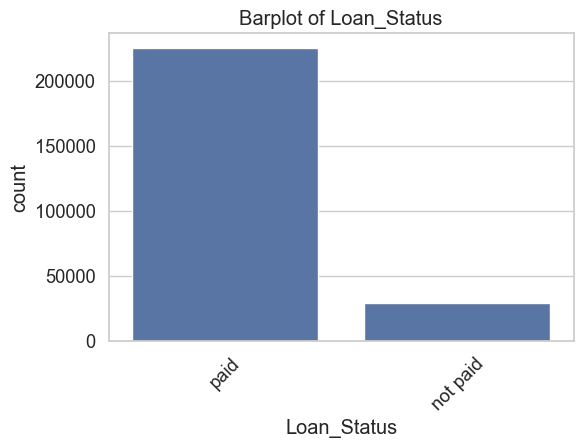

In [105]:
for i in categorical:
    print(f"\n-- Univariate Analysis for: {i} ---")
    plt.figure(figsize=(6,4))
    sns.countplot(data=df,x=i)
    plt.title(f"Barplot of {i}")
    plt.xticks(rotation=45)
    plt.show()

# Univariate Analysis on continues

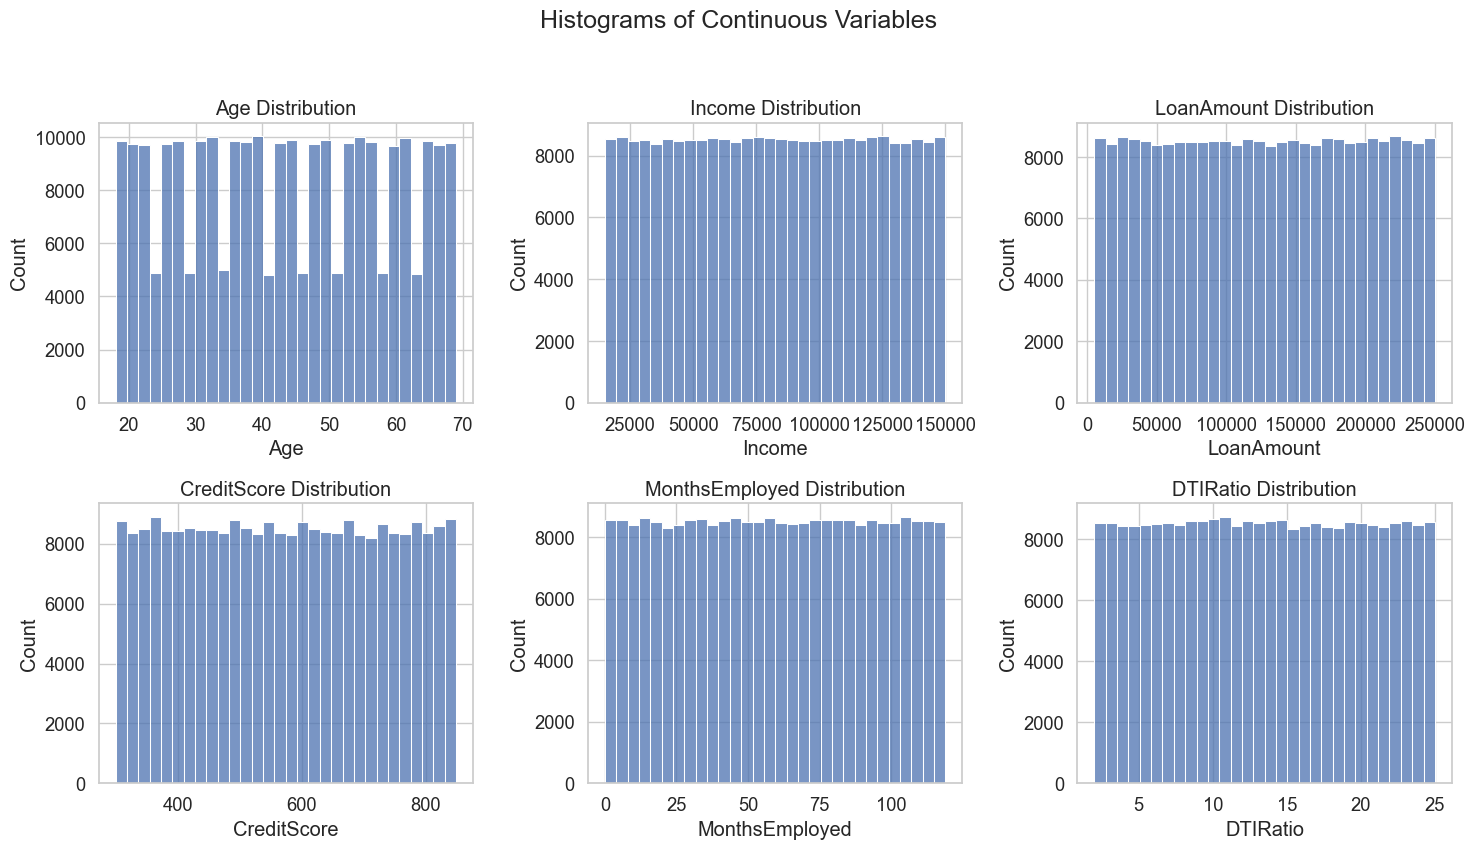

In [106]:
plt.figure(figsize=(15, 12))
plt.suptitle("Histograms of Continuous Variables", fontsize=18)

plt.subplot(3, 3, 1)
sns.histplot(df['Age'], bins=30, kde=False)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")

plt.subplot(3, 3, 2)
sns.histplot(df['Income'], bins=30, kde=False)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")

plt.subplot(3, 3, 3)
sns.histplot(df['LoanAmount'], bins=30, kde=False)
plt.title("LoanAmount Distribution")
plt.xlabel("LoanAmount")
plt.ylabel("Count")

plt.subplot(3, 3, 4)
sns.histplot(df['CreditScore'], bins=30, kde=False)
plt.title("CreditScore Distribution")
plt.xlabel("CreditScore")
plt.ylabel("Count")

plt.subplot(3, 3, 5)
sns.histplot(df['MonthsEmployed'], bins=30, kde=False)
plt.title("MonthsEmployed Distribution")
plt.xlabel("MonthsEmployed")
plt.ylabel("Count")

plt.subplot(3, 3, 6)
sns.histplot(df['InterestRate'], bins=30, kde=False)
plt.title("interestRate Distribution")
plt.xlabel("interestRate")
plt.title("DTIRatio Distribution")
plt.xlabel("DTIRatio")
plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# count varibles -univarte

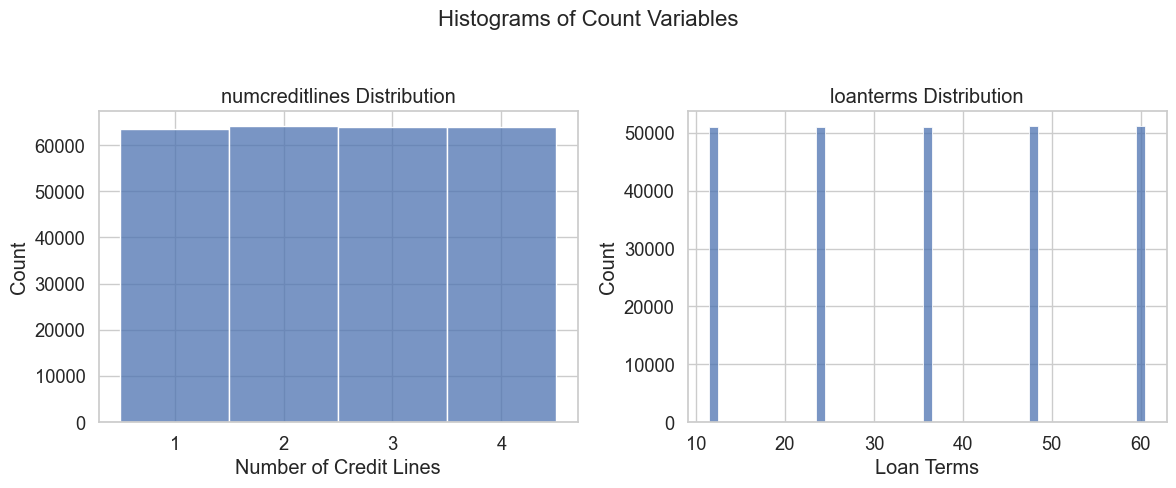

In [107]:
plt.figure(figsize=(12, 5))
plt.suptitle("Histograms of Count Variables", fontsize=16)

plt.subplot(1, 2, 1)
sns.histplot(data=df, x = 'NumCreditLines', bins=range(df['NumCreditLines'].min(), df['NumCreditLines'].max() + 2), discrete=True)
plt.title("numcreditlines Distribution")
plt.xlabel("Number of Credit Lines")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.histplot(data=df, x = 'LoanTerm', bins=range(df['LoanTerm'].min(), df['LoanTerm'].max() + 2), discrete=True)
plt.title("loanterms Distribution")
plt.xlabel("Loan Terms")
plt.ylabel("Count")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

# Bivariate Analysis

In [108]:
df.groupby('Loan_Status')['Age'].mean()

Loan_Status
not paid    36.559539
paid        44.409962
Name: Age, dtype: float64

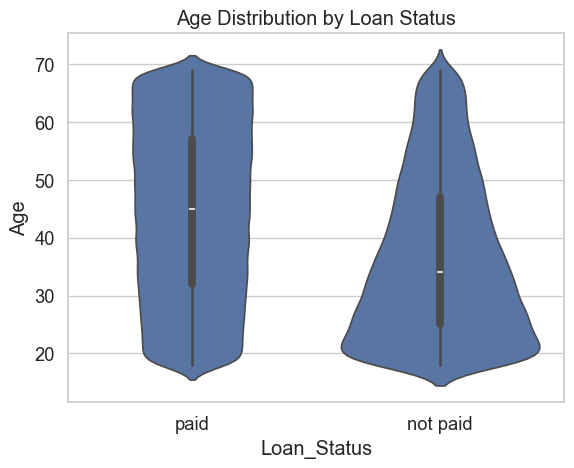

In [109]:
#1 do elder applicants have a higher chance of loan approval compared to younber ones
sns.violinplot(x='Loan_Status',y='Age',data=df)
plt.title('Age Distribution by Loan Status')
plt.show()

In [110]:
#2 Does higer income correlate with larger loan amounts requested or approved?
df[['Income','LoanAmount']].corr()

,Income,LoanAmount
Income,1.000000,-0.000865
LoanAmount,-0.000865,1.000000


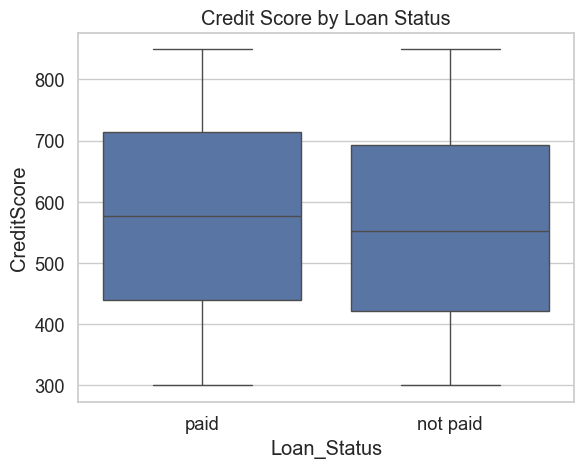

In [111]:
#3 how does credit score affects loan approval rates
#Higher credit scores should generally correspond to higher approval rates
sns.boxplot(x='Loan_Status', y='CreditScore', data=df)
plt.title('Credit Score by Loan Status')
plt.show()

In [112]:
print(df.groupby('Loan_Status')['CreditScore'].mean())

Loan_Status
not paid    559.286143
paid        576.232270
Name: CreditScore, dtype: float64


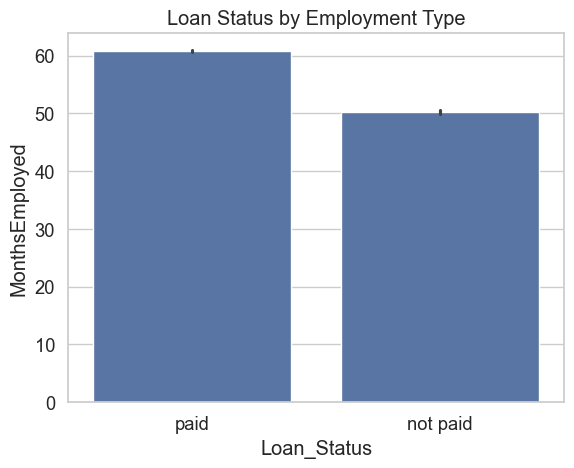

In [113]:
#4 does employment duration influence the likelihood of loan repayment
sns.barplot(x='Loan_Status', y ='MonthsEmployed', data=df)
plt.title('Loan Status by Employment Type')
#plt.legend(title='Loan_Status')
plt.show()


In [114]:
# Create employment duration groups
bins = [0, 12, 36, 60, 120, 240]  # months
labels = ['<1 yr', '1–3 yrs', '3–5 yrs', '5–10 yrs', '10+ yrs']
df['EmploymentGroup'] = pd.cut(df['MonthsEmployed'], bins=bins, labels=labels, right=False)

# Group by and calculate repayment rate
repayment_rate = df.groupby('EmploymentGroup')['Loan_Status'].value_counts(normalize=True).unstack()
print(repayment_rate)

Loan_Status      not paid      paid
EmploymentGroup                    
<1 yr            0.169679  0.830321
1–3 yrs          0.150129  0.849871
3–5 yrs          0.121987  0.878013
5–10 yrs         0.089521  0.910479
10+ yrs          0.000000  0.000000


C:\Users\himan\AppData\Local\Temp\ipykernel_18004\1016472016.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  repayment_rate = df.groupby('EmploymentGroup')['Loan_Status'].value_counts(normalize=True).unstack()


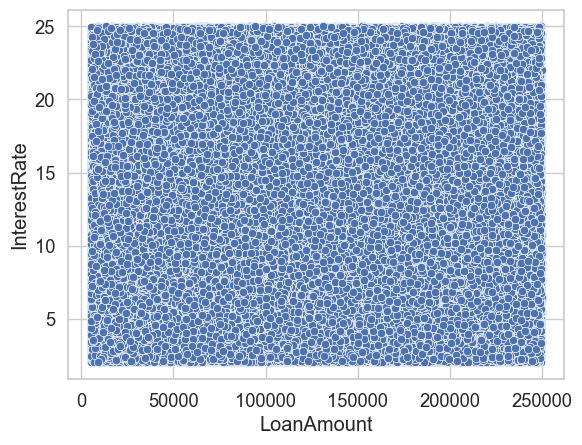

In [115]:
#5higher loan amounts associated with higher or lower interest rates
sns.scatterplot(x="LoanAmount",y="InterestRate",data=df)
plt.show()

In [116]:
df[['LoanAmount','InterestRate']].corr()

,LoanAmount,InterestRate
LoanAmount,1.000000,-0.002291
InterestRate,-0.002291,1.000000


In [117]:
#6Does a borrower's Debt-to-Income Ratio (DTIRatio) affect their chances of loan repayment
df.groupby('Loan_Status')['DTIRatio'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
not paid,29653.0,0.512467,0.229160,0.1,0.32,0.52,0.71,0.9
paid,225694.0,0.498602,0.231099,0.1,0.30,0.50,0.70,0.9


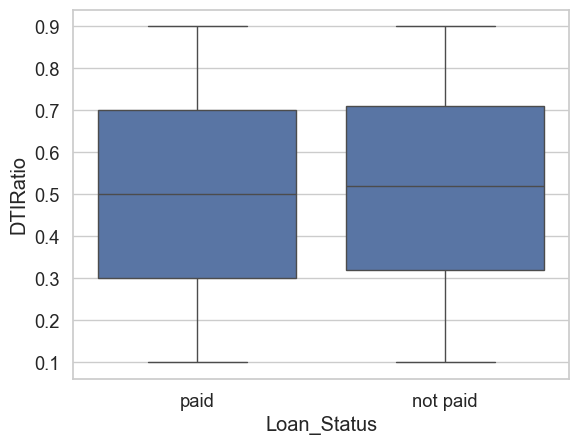

In [118]:
sns.boxplot(x='Loan_Status', y='DTIRatio', data=df)
plt.show()

In [119]:
#7How does education level affect income distribution
df.groupby('Education')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor's,64366.0,82580.142622,38915.380242,15004.0,49049.0,82386.5,116253.75,149999.0
High School,63903.0,82294.182949,38901.145868,15000.0,48844.5,82253.0,115783.50,149999.0
Master's,63541.0,82835.208936,38941.503477,15000.0,49190.0,83103.0,116648.00,149995.0
PhD,63537.0,82287.789587,39092.972696,15000.0,48278.0,82170.0,116133.00,149997.0


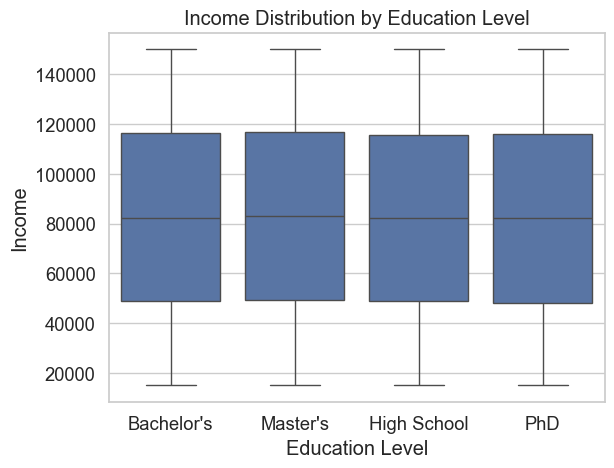

In [120]:
sns.boxplot(x='Education', y='Income', data=df)
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.show()

In [121]:
#8 Does employment type (e.g., salaried, self-employed) affect loan approval rates?
# Group by EmploymentType and Loan_Status
emp_status_counts = df.groupby(['EmploymentType', 'Loan_Status']).size().unstack()
print(emp_status_counts)

Loan_Status     not paid   paid
EmploymentType                 
Full-time           6024  57632
Part-time           7677  56484
Self-employed       7302  56404
Unemployed          8650  55174


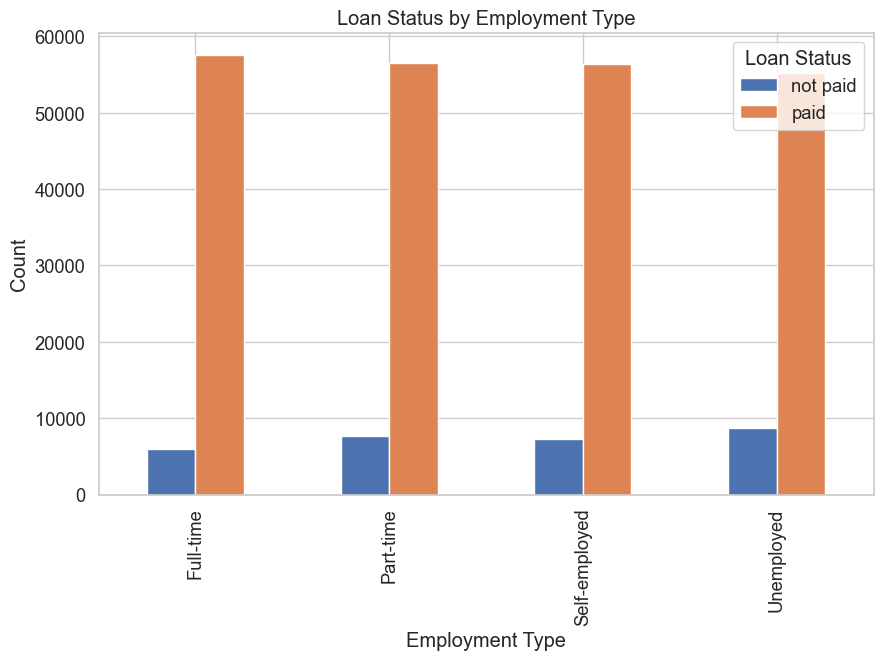

In [122]:
emp_status_counts.plot(kind='bar', figsize=(10,6))
plt.title('Loan Status by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [123]:
#9 Do married applicants tend to take out larger loans?
df.groupby('MaritalStatus')['LoanAmount'].describe()


,count,mean,std,min,25%,50%,75%,max
MaritalStatus,,,,,,,,
Divorced,85033.0,127810.225265,70823.943011,5005.0,66220.00,128119.0,189339.00,249993.0
Married,85302.0,127250.951326,70701.509099,5000.0,66018.25,126929.5,188488.25,249997.0
Single,85012.0,127676.481403,70996.461487,5001.0,66229.75,127626.5,189079.00,249999.0


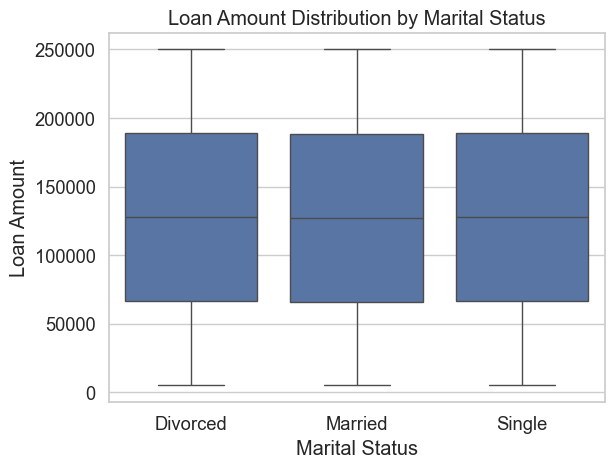

In [124]:
sns.boxplot(data=df, x='MaritalStatus', y='LoanAmount')
plt.title('Loan Amount Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Loan Amount')
plt.show()


In [125]:
#10 Do  applicants with mortagags have higher higher dti ratio
df.groupby('HasMortgage')['DTIRatio'].describe()


,count,mean,std,min,25%,50%,75%,max
HasMortgage,,,,,,,,
No,127670.0,0.500159,0.231035,0.1,0.3,0.5,0.7,0.9
Yes,127677.0,0.500266,0.230799,0.1,0.3,0.5,0.7,0.9


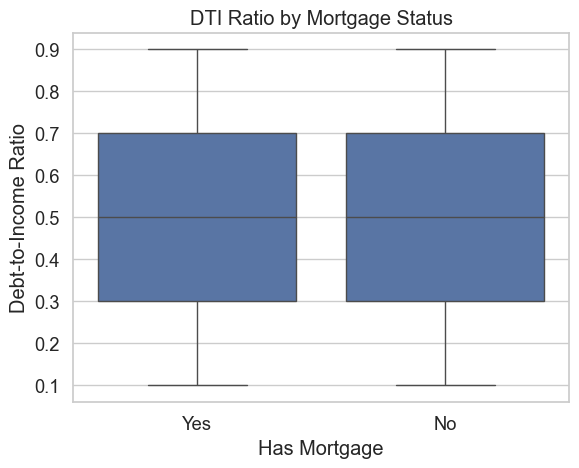

In [126]:
sns.boxplot(data=df, x='HasMortgage', y='DTIRatio')
plt.title('DTI Ratio by Mortgage Status')
plt.xlabel('Has Mortgage')
plt.ylabel('Debt-to-Income Ratio')
plt.show()

In [127]:
#11 does no of credit lines influence loan repayment status
df.groupby('Loan_Status')['NumCreditLines'].describe()


,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
not paid,29653.0,2.588338,1.118258,1.0,2.0,3.0,4.0,4.0
paid,225694.0,2.489566,1.116350,1.0,1.0,2.0,3.0,4.0


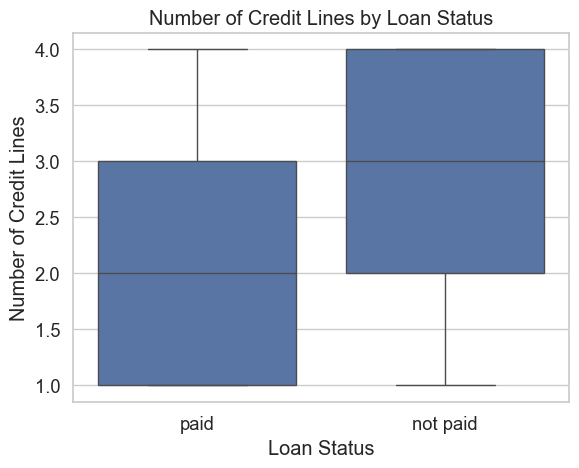

In [128]:
sns.boxplot(data=df, x='Loan_Status', y='NumCreditLines')
plt.title('Number of Credit Lines by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Credit Lines')
plt.show()

In [129]:
#12 how does the length of the loan term affects the interest rate
df.groupby('LoanTerm')['InterestRate'].describe()


,count,mean,std,min,25%,50%,75%,max
LoanTerm,,,,,,,,
12,50957.0,13.500817,6.632938,2.0,7.76,13.53,19.24,25.0
24,51009.0,13.482212,6.633033,2.0,7.76,13.44,19.22,25.0
36,51061.0,13.463228,6.646008,2.0,7.73,13.42,19.25,25.0
48,51166.0,13.509511,6.648063,2.0,7.77,13.45,19.30,25.0
60,51154.0,13.508043,6.622272,2.0,7.82,13.48,19.24,25.0


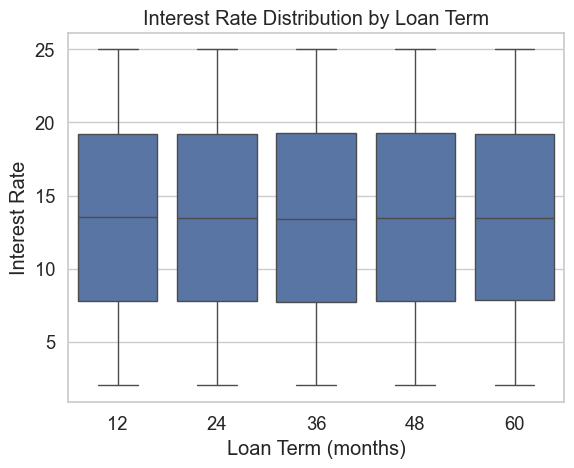

In [130]:

sns.boxplot(data=df, x='LoanTerm', y='InterestRate')
plt.title('Interest Rate Distribution by Loan Term')
plt.xlabel('Loan Term (months)')
plt.ylabel('Interest Rate')
plt.show()


In [131]:
#13 Are certain loan purposes associated with higher defaults
loan_purpose_counts = df.groupby(['LoanPurpose', 'Loan_Status']).size().unstack(fill_value=0)
print(loan_purpose_counts)

Loan_Status  not paid   paid
LoanPurpose                 
Auto             6041  44803
Business         6323  44975
Education        6038  44967
Home             5249  46037
Other            6002  44912


In [132]:
df["LoanPurpose"].value_counts()

LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64

In [133]:
loan_purpose_counts = pd.DataFrame({
    'not_paid': [6041, 6323, 6038, 5249, 6002],
    'paid': [44803, 44975, 44967, 46037, 44912]
}, index=['Auto', 'Business', 'Education', 'Home', 'Other'])

loan_purpose_counts['default_rate'] = loan_purpose_counts['not_paid'] / (loan_purpose_counts['not_paid'] + loan_purpose_counts['paid']) * 100
print(loan_purpose_counts[['not_paid', 'paid', 'default_rate']])


           not_paid   paid  default_rate
Auto           6041  44803     11.881441
Business       6323  44975     12.326017
Education      6038  44967     11.838055
Home           5249  46037     10.234762
Other          6002  44912     11.788506


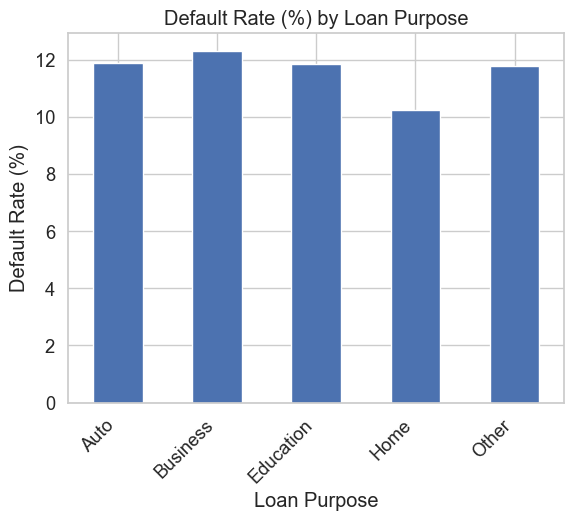

In [135]:
loan_purpose_counts['default_rate'].plot(kind='bar')
plt.title('Default Rate (%) by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [56]:
#14 Do applicants with dependents have different income level
df.groupby('HasDependents')['Income'].describe()


,count,mean,std,min,25%,50%,75%,max
HasDependents,,,,,,,,
No,127605.0,82560.494785,38952.804177,15002.0,48942.00,82531.0,116306.0,149999.0
Yes,127742.0,82438.180035,38973.266212,15000.0,48729.25,82404.5,116132.0,149999.0


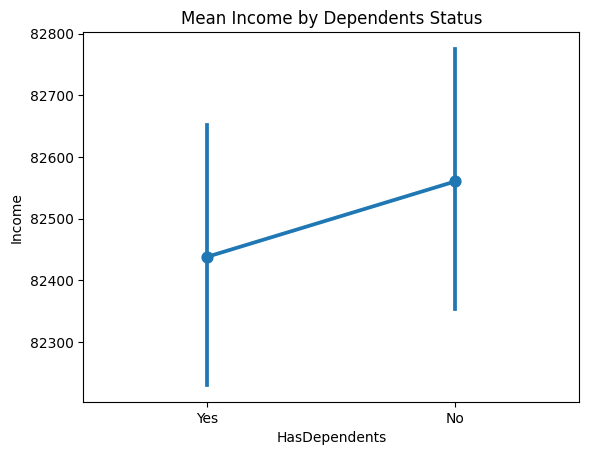

In [55]:
sns.pointplot(data=df, x='HasDependents', y='Income')
plt.title('Mean Income by Dependents Status')
plt.show()


In [59]:
from scipy.stats import ttest_ind

income_yes = df[df['HasDependents'] == 'Yes']['Income']
income_no = df[df['HasDependents'] == 'No']['Income']

t_stat, p_val = ttest_ind(income_yes, income_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("The difference in mean income is statistically significant.")
else:
    print("No statistically significant difference in mean income.")


T-statistic: -0.7932
P-value: 0.4277
No statistically significant difference in mean income.


In [60]:
#15 Does having a co-signer affects loan approval or repayment
co_signer_status = df.groupby(['HasCoSigner', 'Loan_Status']).size().unstack()
print(co_signer_status)


Loan_Status  not paid    paid
HasCoSigner                  
No              16423  111223
Yes             13230  114471


In [61]:
co_signer_percent = co_signer_status.div(co_signer_status.sum(axis=1), axis=0) * 100
print(co_signer_percent)


Loan_Status   not paid       paid
HasCoSigner                      
No           12.866051  87.133949
Yes          10.360138  89.639862


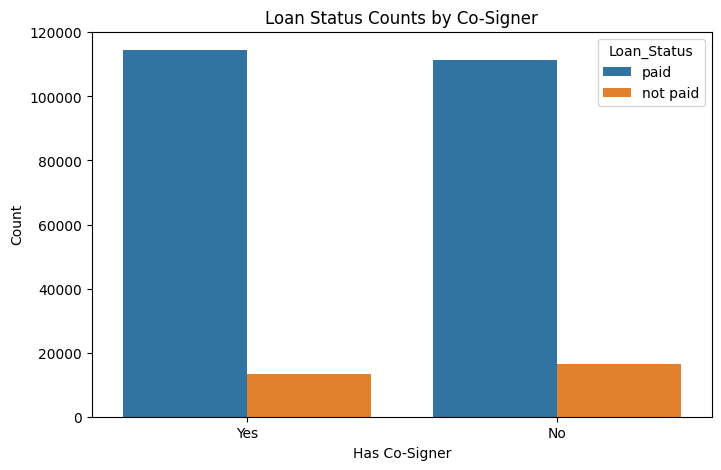

In [68]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='HasCoSigner', hue='Loan_Status')
plt.title('Loan Status Counts by Co-Signer')
plt.xlabel('Has Co-Signer')
plt.ylabel('Count')
plt.show()


# Multivariate Analysis

In [79]:
# How does income vary by age group and loan repayment status?
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70])
df.groupby(['Loan_Status', 'AgeGroup'])['Income'].mean().unstack()

C:\Users\himan\AppData\Local\Temp\ipykernel_18004\768718112.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Loan_Status', 'AgeGroup'])['Income'].mean().unstack()


AgeGroup,"(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]"
Loan_Status,,,,,
not paid,73393.042058,71448.706735,70386.842648,69533.090483,69894.420322
paid,84904.081613,84164.276197,83663.096798,83164.425467,83472.757029


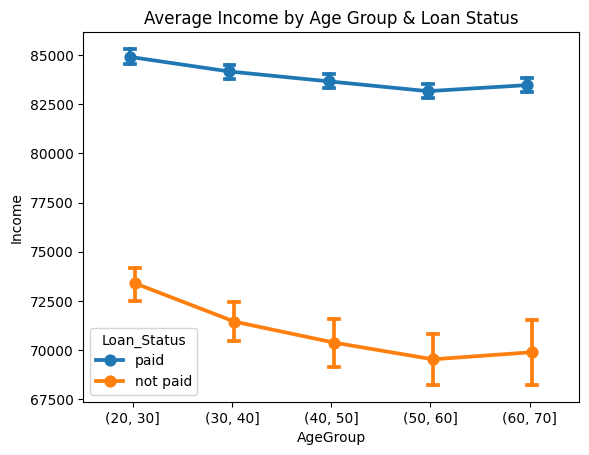

In [75]:
sns.pointplot(data=df, x='AgeGroup', y='Income', hue='Loan_Status', dodge=True, capsize=0.1)
plt.title('Average Income by Age Group & Loan Status')
plt.show()


In [85]:
#Does employment type influence the relationship between credit score and loan repayment?
grouped = df.groupby(['EmploymentType', 'Loan_Status'])['CreditScore'].mean().unstack()
print(grouped)

Loan_Status       not paid        paid
EmploymentType                        
Full-time       558.489376  574.966703
Part-time       559.070600  576.137632
Self-employed   559.197617  576.684384
Unemployed      560.107052  577.188911


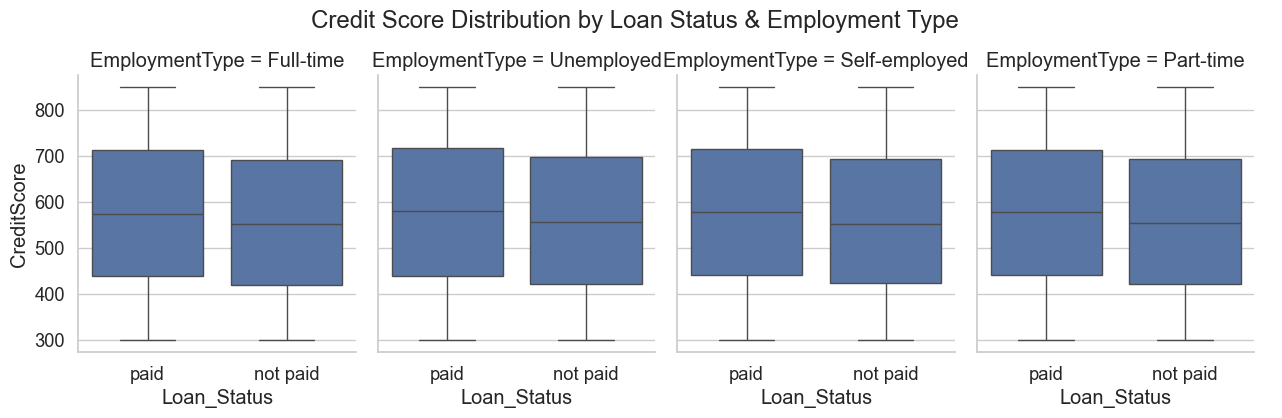

In [90]:
sns.catplot(data=df, x='Loan_Status', y='CreditScore',col='EmploymentType', kind='box',height=4, aspect=0.8)
plt.suptitle('Credit Score Distribution by Loan Status & Employment Type', y=1.05)
plt.show()


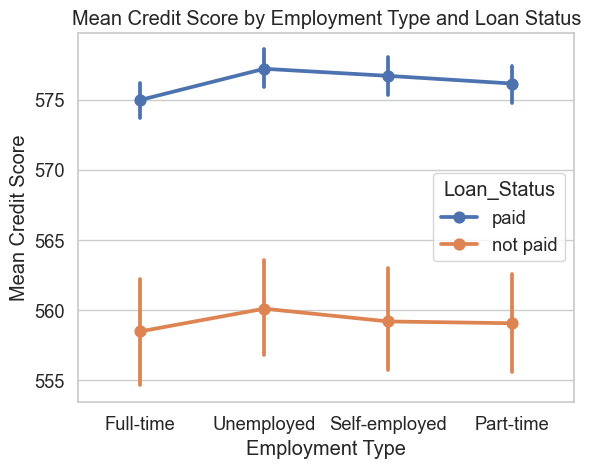

In [86]:

sns.pointplot(data=df,x='EmploymentType',y='CreditScore',hue='Loan_Status')
plt.title('Mean Credit Score by Employment Type and Loan Status')
plt.ylabel('Mean Credit Score')
plt.xlabel('Employment Type')
plt.show()


In [94]:
#Is high debt-to-income ratio a stronger risk factor for mortgage holders?
df.groupby(['HasMortgage', 'Loan_Status'])['DTIRatio'].median().unstack()


Loan_Status,not paid,paid
HasMortgage,,
No,0.52,0.5
Yes,0.52,0.5


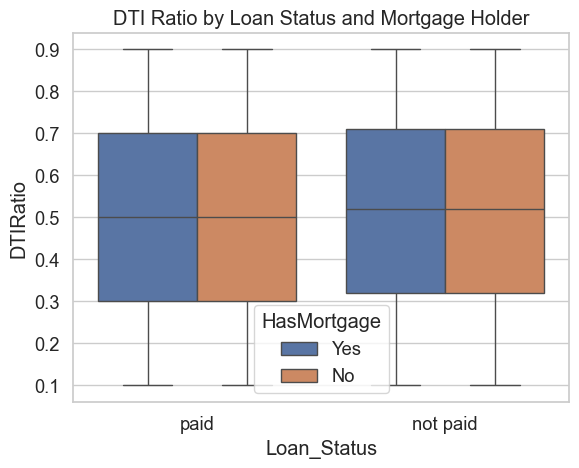

In [95]:
sns.boxplot(data=df, x='Loan_Status', y='DTIRatio', hue='HasMortgage')
plt.title('DTI Ratio by Loan Status and Mortgage Holder')
plt.show()

In [96]:
#Does having a co-signer relate to income and loan repayment success?
df.groupby(['HasCoSigner', 'Loan_Status'])['Income'].median().unstack()


Loan_Status,not paid,paid
HasCoSigner,,
No,67400.0,84594.0
Yes,65629.0,83894.0


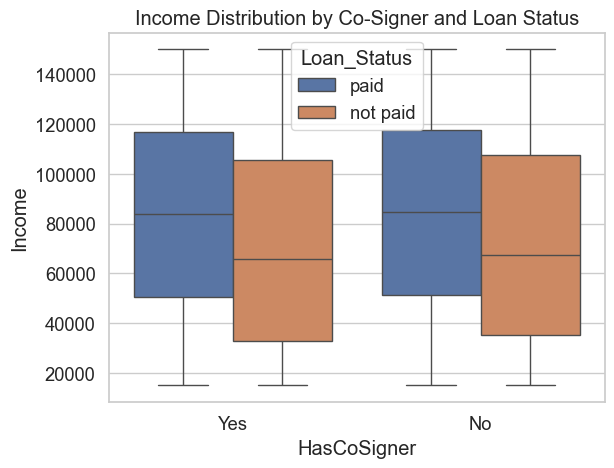

In [101]:
sns.boxplot(data=df, x='HasCoSigner', y='Income', hue='Loan_Status')
plt.title('Income Distribution by Co-Signer and Loan Status')
plt.show()
